In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

from src.dataset.chess_dataframe import ChessDataFrame, Sizes
from logging_config import setup_logging

# Setup logging
logger = setup_logging()

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
logger.info(f"Using device: {device}")

# I need to make csv batches of data and uploads it to huggingface
dataset = ChessDataFrame(size=Sizes.extra_smol)
logger.info("Successfully initialized ChessDataset")

21:42:26 - chessAI - INFO Using device: mps
21:42:26 - chessAI - INFO Initializing ChessDataset
21:42:26 - chessAI - INFO Repository Youcef/chessGames already exists
21:42:26 - chessAI - INFO Dataset already exists, loading...
21:42:28 - chessAI - INFO Successfully initialized ChessDataset


In [23]:
dataset.df_train

,Result,WhiteElo,BlackElo,Player,Time,Eval,Raw Eval,Board
29,1,1288,1287,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 1.0, 1.0, 0.9833333333333333, 1.0, ...","[0.15, 0.21, 0.11, 0.53, 0.17, 0.27, 0.25, 0.3...","[0.15, 0.21, 0.11, 0.53, 0.17, 0.27, 0.25, 0.3...",[rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
535,1,1844,1922,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 0.9833333333333333, 1.0, 0.96666666...","[0.15, 0.25, 0.22, 0.31, 0.21, 0.34, 0.37, 0.3...","[0.15, 0.25, 0.22, 0.31, 0.21, 0.34, 0.37, 0.3...",[rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
695,0,1816,1822,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 0.9833333333333333, 1.0, 0.96666666...","[-0.28, 0.33, -0.41, -0.41, -0.5, -0.47, -1.89...","[-0.28, 0.33, -0.41, -0.41, -0.5, -0.47, -1.89...",[rnbqkbnr/pppppppp/8/8/7P/8/PPPPPPP1/RNBQKBNR ...
557,1,1024,1111,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 0.9666666666666667, 1.0, 0.93333333...","[0.16, 0.23, -0.58, 0.96, -0.53, -0.56, -0.56,...","[0.16, 0.23, -0.58, 0.96, -0.53, -0.56, -0.56,...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
836,0,1350,1324,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 0.9833333333333333, 0.9666666666666...","[0.15, 0.21, -0.45, 0.16, 0.0, 2.14, -0.9, -0....","[0.15, 0.21, -0.45, 0.16, 0.0, 2.14, -0.9, -0....",[rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
...,...,...,...,...,...,...,...,...
106,0,1454,1440,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 0.9833333333333333, 0.9833333333333...","[0.16, 0.23, 0.19, 0.53, 0.07, 0.29, -0.16, 0....","[0.16, 0.23, 0.19, 0.53, 0.07, 0.29, -0.16, 0....",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
270,1,2048,1916,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 1.0, 0.9833333333333333, 0.98333333...","[0.15, 0.21, 0.11, 0.53, 0.28, 0.5, 0.49, 1.16...","[0.15, 0.21, 0.11, 0.53, 0.28, 0.5, 0.49, 1.16...",[rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...
860,1,2325,2283,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 0.95,...","[0.16, 0.23, 0.2, 0.39, 0.13, 0.19, 0.17, 0.24...","[0.16, 0.23, 0.2, 0.39, 0.13, 0.19, 0.17, 0.24...",[rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR...
435,0,1123,1924,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...","[1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 0.966...","[0.15, 0.26, 0.33, 0.27, -0.97, 0.35, 0.29, 0....","[0.15, 0.26, 0.33, 0.27, -0.97, 0.35, 0.29, 0....",[rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR...


In [24]:
from src.dataset.helpers import board_fen_to_image

def arr_to_imgs(arr):
    return torch.tensor(np.array([board_fen_to_image(x) for x in arr]), dtype=torch.float32)

def afloat(arr):
    return [float(x) for x in arr]

train_X = dataset.df_train["Board"].apply(arr_to_imgs).to_numpy()
test_X = dataset.df_test["Board"].apply(arr_to_imgs).to_numpy()
test_Y = dataset.df_test["Result"].to_numpy()
train_Y = dataset.df_train["Result"].to_numpy()


In [29]:
train_Y.shape

(800,)

In [21]:
test_Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1])

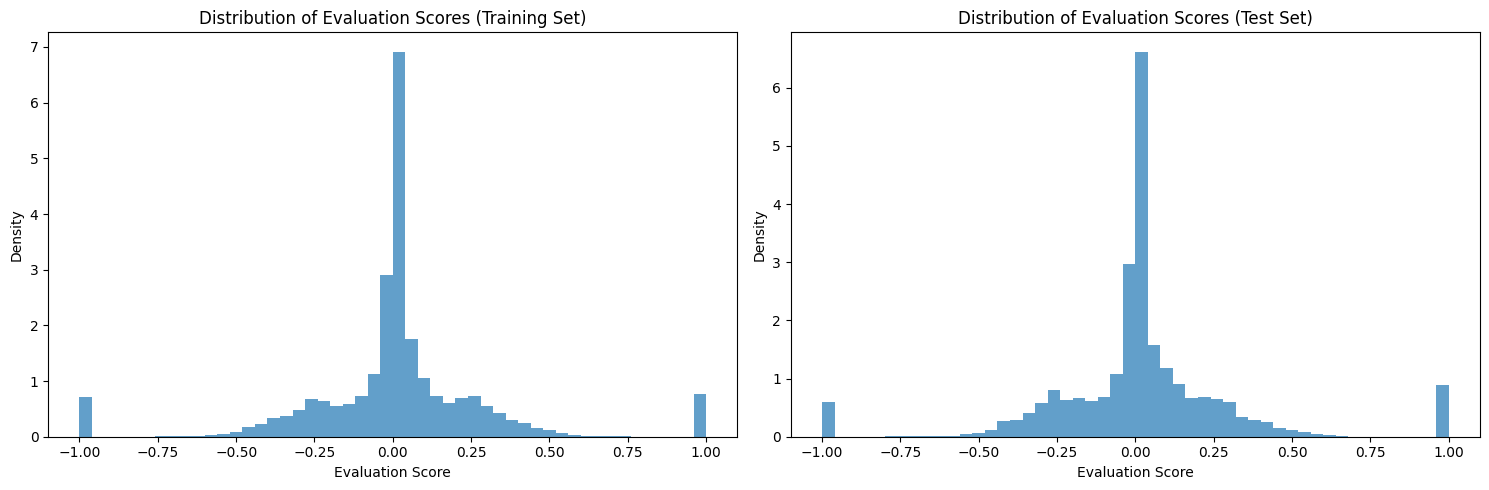


Training Set Statistics:
Mean: 0.011
Std: 0.305
Min: -1.000
Max: 1.000

Test Set Statistics:
Mean: 0.018
Std: 0.306
Min: -1.000
Max: 1.000


In [14]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
plt.figure(figsize=(15, 5))

# Training data distribution
plt.subplot(1, 2, 1)
plt.hist(train_Y, bins=50, density=True, alpha=0.7)
plt.title('Distribution of Evaluation Scores (Training Set)')
plt.xlabel('Evaluation Score')
plt.ylabel('Density')

# Test data distribution
plt.subplot(1, 2, 2)
plt.hist(test_Y, bins=50, density=True, alpha=0.7)
plt.title('Distribution of Evaluation Scores (Test Set)')
plt.xlabel('Evaluation Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Print some basic statistics
print("\nTraining Set Statistics:")
print(f"Mean: {np.mean(train_Y):.3f}")
print(f"Std: {np.std(train_Y):.3f}")
print(f"Min: {np.min(train_Y):.3f}")
print(f"Max: {np.max(train_Y):.3f}")

print("\nTest Set Statistics:")
print(f"Mean: {np.mean(test_Y):.3f}")
print(f"Std: {np.std(test_Y):.3f}")
print(f"Min: {np.min(test_Y):.3f}")
print(f"Max: {np.max(test_Y):.3f}")

In [42]:
train_X.shape

(367006, 12, 8, 8)

In [43]:
train_Y.shape

(367006,)

In [15]:
train_Y[0]

np.float32(0.17)

In [16]:
train_X[0]

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

In [15]:
class ChessEvalNet(nn.Module):
    def __init__(self):
        super(ChessEvalNet, self).__init__()
        
        # Initial projection to match channels for residual
        self.proj1 = nn.Conv2d(12, 64, kernel_size=1)
        self.proj2 = nn.Conv2d(64, 128, kernel_size=1)
        self.proj3 = nn.Conv2d(128, 256, kernel_size=1)
        
        # Convolutional layers
        self.conv1a = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv1b = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        
        self.conv2a = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2b = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        
        self.conv3a = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3b = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        
        # Batch normalization
        self.bn1a = nn.BatchNorm2d(64)
        self.bn1b = nn.BatchNorm2d(64)
        self.bn2a = nn.BatchNorm2d(128)
        self.bn2b = nn.BatchNorm2d(128)
        self.bn3a = nn.BatchNorm2d(256)
        self.bn3b = nn.BatchNorm2d(256)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        
        self.relu = nn.LeakyReLU(0.1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # First residual block
        identity = self.proj1(x)
        x = self.relu(self.bn1a(identity))
        x = self.relu(self.bn1a(self.conv1a(x)))
        x = self.bn1b(self.conv1b(x))
        x = self.relu(x + identity)
        
        # Second residual block
        identity = self.proj2(x)
        x = self.relu(self.bn2a(self.conv2a(x)))
        x = self.bn2b(self.conv2b(x))
        x = self.relu(x + identity)
        
        # Third residual block
        identity = self.proj3(x)
        x = self.relu(self.bn3a(self.conv3a(x)))
        x = self.bn3b(self.conv3b(x))
        x = self.relu(x + identity)
        
        # Fully connected layers
        x = x.view(-1, 256 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        
        return x

# Create model and move to device
model = ChessEvalNet().to(device)

# Convert data to tensors and create DataLoader
X_train = torch.FloatTensor(train_X).to(device)
y_train = torch.FloatTensor(train_Y).to(device)
X_test = torch.FloatTensor(test_X).to(device)
y_test = torch.FloatTensor(test_Y).to(device)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
# Modified training parameters
batch_size = 32  # Increased batch size
num_epochs = 100   # More epochs

# Create model and move to device
model = ChessEvalNet().to(device)

# Loss function and optimizer with learning rate scheduler
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

# Update DataLoader with new batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


def evaluate_model(model_to_eval, data_loader_eval):
    model_to_eval.eval()
    eval_total_loss = 0
    with torch.no_grad():
        for batch_x, batch_Y in data_loader_eval:
            batch_outputs = model_to_eval(batch_x)
            batch_loss = criterion(batch_outputs.squeeze(), batch_Y)
            eval_total_loss += batch_loss.item()
    return eval_total_loss / len(data_loader_eval)

# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    # Calculate losses
    train_loss = total_loss / len(train_loader)
    test_loss = evaluate_model(model, test_loader)
    
    # Step the scheduler based on validation loss
    scheduler.step(test_loss)  # Add this line
    
    # Print epoch statistics
    logger.info(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, lr: {optimizer.param_groups[0]["lr"]}')

/Users/youcefboumar/PycharmProjects/ChessAI/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


19:57:13 - chessAI - INFO Epoch [1/100], Train Loss: 0.0806, Test Loss: 1.1240, lr: 0.001
19:57:37 - chessAI - INFO Epoch [2/100], Train Loss: 0.0440, Test Loss: 0.1534, lr: 0.001
19:58:02 - chessAI - INFO Epoch [3/100], Train Loss: 0.0390, Test Loss: 0.0796, lr: 0.001
19:58:27 - chessAI - INFO Epoch [4/100], Train Loss: 0.0351, Test Loss: 0.0791, lr: 0.001
19:58:52 - chessAI - INFO Epoch [5/100], Train Loss: 0.0329, Test Loss: 0.0830, lr: 0.001
19:59:17 - chessAI - INFO Epoch [6/100], Train Loss: 0.0309, Test Loss: 0.3751, lr: 0.001
19:59:42 - chessAI - INFO Epoch [7/100], Train Loss: 0.0298, Test Loss: 0.1011, lr: 0.001
20:00:07 - chessAI - INFO Epoch [8/100], Train Loss: 0.0280, Test Loss: 0.3445, lr: 0.001
20:00:32 - chessAI - INFO Epoch [9/100], Train Loss: 0.0263, Test Loss: 0.1243, lr: 0.001
20:00:57 - chessAI - INFO Epoch [10/100], Train Loss: 0.0247, Test Loss: 0.1443, lr: 0.001
20:01:22 - chessAI - INFO Epoch [11/100], Train Loss: 0.0246, Test Loss: 0.2160, lr: 0.001
20:01:47

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for batch_X, batch_y in data_loader:
            outputs = model(batch_X)
            all_predictions.extend(outputs.squeeze().cpu().numpy())
            all_targets.extend(batch_y.cpu().numpy())
            
    all_predictions = np.array(all_predictions)
    all_targets = np.array(all_targets)
    
    metrics = {
        'MAE': mean_absolute_error(all_targets, all_predictions),
        'MSE': mean_squared_error(all_targets, all_predictions),
        'RMSE': np.sqrt(mean_squared_error(all_targets, all_predictions)),
        'R2': r2_score(all_targets, all_predictions)
    }
    
    return metrics

# Calculate metrics for both training and test sets
train_metrics = calculate_metrics(model, train_loader)
test_metrics = calculate_metrics(model, test_loader)

# Print results
logger.info("Training Set Metrics:")
for metric, value in train_metrics.items():
    logger.info(f"{metric}: {value:.4f}")

logger.info("\nTest Set Metrics:")
for metric, value in test_metrics.items():
    logger.info(f"{metric}: {value:.4f}")

20:42:26 - chessAI - INFO Training Set Metrics:
20:42:26 - chessAI - INFO MAE: 0.2900
20:42:26 - chessAI - INFO MSE: 0.1415
20:42:26 - chessAI - INFO RMSE: 0.3762
20:42:26 - chessAI - INFO R2: -0.5236
20:42:26 - chessAI - INFO 
Test Set Metrics:
20:42:26 - chessAI - INFO MAE: 0.2903
20:42:26 - chessAI - INFO MSE: 0.1437
20:42:26 - chessAI - INFO RMSE: 0.3790
20:42:26 - chessAI - INFO R2: -0.5384
